# Change-over-Time
Give emphasis to changing trends. These can be short (intra-day) movements or extended series traversing decades or centuries: Choosing the correct time period is important to provide suitable context for the reader.

In [1]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *
import utils

## Line
The standard way to show a changing time series. If data are irregular, consider markers to represent data points

In [12]:
df = pd.read_csv('data/column-line-timeline.csv')
df.head()

,Order Date,Sales,Profit
0,2015 Mar,148895.5920,7622.4580
1,2015 Jun,173077.5192,22408.1384
2,2015 Sep,287266.4246,25609.4436
3,2015 Dec,359255.4604,43447.9082
4,2016 Mar,137703.4772,18529.8832


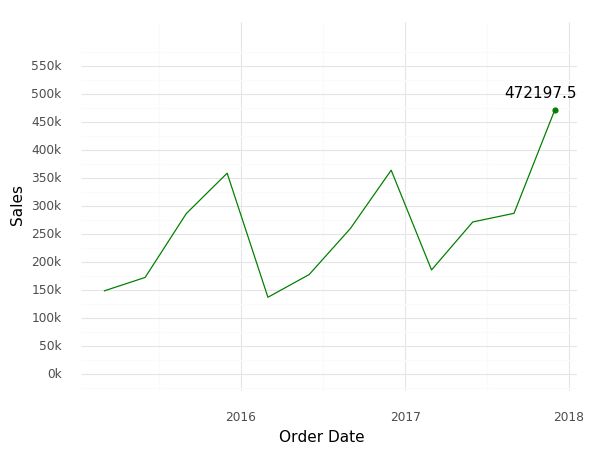

<ggplot: (-9223363305517434154)>

In [21]:
g = (ggplot(df,aes(x='Order Date',y='Sales',group=1)) +
     geom_line(color='green') + theme_minimal() + 
     geom_point(df[df.index==df.index.max()],
               aes(x='Order Date', y='Sales'),color='green') +
     geom_text(df[df.index==df.index.max()],
               aes(x='Order Date', y='Sales',
                  label='Sales'), nudge_y=30000) + #nudge it a bit to the right
     #formatting date x-axis
     scale_x_date(breaks=date_breaks('1 year'), labels=date_format('%Y')) +
     scale_y_continuous(limits=(0,600000),
                        breaks=range(0,600000,50000),
                        labels=utils.k_format()) +
     ylab('Sales') + xlab('Order Date') 
    )
g

## Column
Columns work well for showing change over time - but usually best with only one series of data at a time

In [ ]:
df = pd.read_csv('data/column-line-timeline.csv')
df.head()

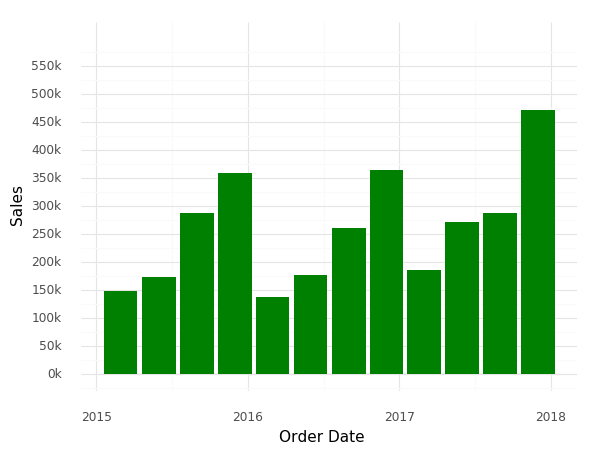

<ggplot: (-9223363305517425415)>

In [4]:
g = (ggplot(df,aes(x='Order Date',y='Sales',group=1)) +
     geom_col(fill='green') + theme_minimal() +
     #formatting date x-axis
     scale_x_date(breaks=date_breaks('1 year'), labels=date_format('%Y')) +
     scale_y_continuous(limits=(0,600000),
                        breaks=range(0,600000,50000),
                        labels=utils.k_format()) +
     ylab('Sales') + xlab('Order Date') 
    )
g

## ~~Column + line timeline~~ Normalized line plot
~~A good way of showing the relationship over time between an amount (columns) and a rate (line).~~ Using two axes of different scales is not an advisable visualization practice as detailed by [Hadley Wickham's answer](https://stackoverflow.com/questions/3099219/ggplot-with-2-y-axes-on-each-side-and-different-scales). We suggest using a line plot where all values are normalized by the first value instead.

In [ ]:
df = pd.read_csv('data/column-line-timeline.csv')
df.head()

In [5]:
df['sales_start'] = df['Sales'][0]
df['profit_start'] = df['Profit'][0]
df['sales_one'] = df['Sales']/df['sales_start']
df['profit_one'] = df['Profit']/df['profit_start']
df = df[['Order Date','sales_one','profit_one']]
df.head()

,Order Date,sales_one,profit_one
0,2015 Mar,1.000000,1.000000
1,2015 Jun,1.162409,2.939752
2,2015 Sep,1.929314,3.359736
3,2015 Dec,2.412801,5.699987
4,2016 Mar,0.924832,2.430959


In [6]:
df_m = df.melt(id_vars='Order Date')
df_m.head()

,Order Date,variable,value
0,2015 Mar,sales_one,1.000000
1,2015 Jun,sales_one,1.162409
2,2015 Sep,sales_one,1.929314
3,2015 Dec,sales_one,2.412801
4,2016 Mar,sales_one,0.924832


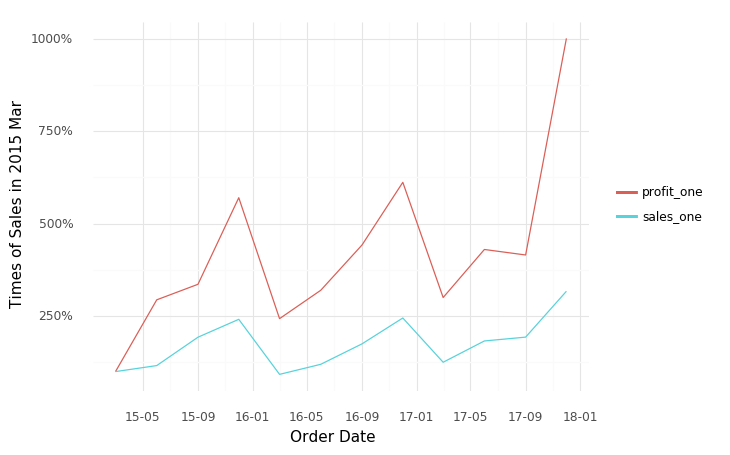

<ggplot: (-9223363305517425271)>

In [7]:
g = (ggplot(df_m,aes(x='Order Date',y='value',group='variable',color='variable')) +
     geom_line() + theme_minimal() +
     scale_x_date(labels=date_format('%y-%m')) +
     scale_y_continuous(labels=percent_format()) +
     ylab('Times of Sales in 2015 Mar') + xlab('Order Date') +
     theme(legend_title=element_blank())
    )
g

## Slope
Good for showing changing data as long as the data can be simplified into 2 or 3 points without missing a key part of story

In [8]:
df = pd.read_csv('data/slope-2.csv')
df.head()

,Department,Color,Year,Sales
0,Tools,False,2016,91303.0
1,Tools,False,2017,85144.0
2,Sports,False,2016,94912.0
3,Sports,False,2017,80557.0
4,Home,False,2016,91107.0


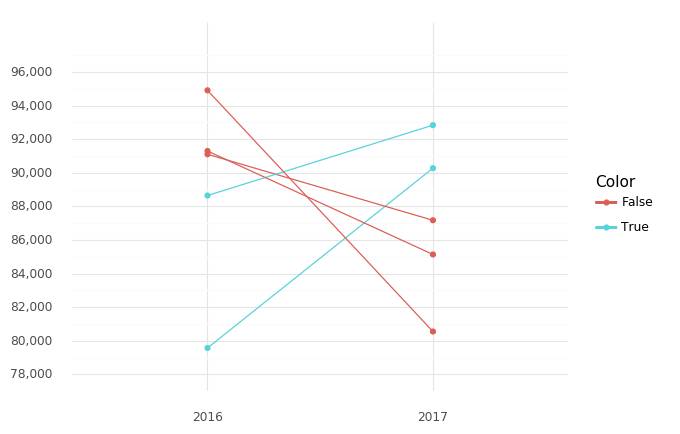

<ggplot: (8731337276985)>

In [9]:
g = (ggplot(df,aes(x='factor(Year)',y='Sales',color='Color',group='Department')) +
     geom_point() + geom_line() + theme_minimal() +
     xlab('') + ylab('') +
     scale_y_continuous(limits=(78000,98000), breaks=range(78000,98000,2000),
                        labels=utils.prettynum_format())
    )
g

## Area chart
Use with care. These are good at showing changes to total, but seeing change in components can be very difficult.

In [57]:
df = pd.read_csv('data/area-chart.csv')
df.head()

,Date,Sales,Category
0,2015-03-01,22656.1390,Furniture
1,2015-03-01,14528.6830,Office Supplies
2,2015-03-01,37262.9740,Technology
3,2015-06-01,28063.7496,Furniture
4,2015-06-01,31243.7350,Office Supplies


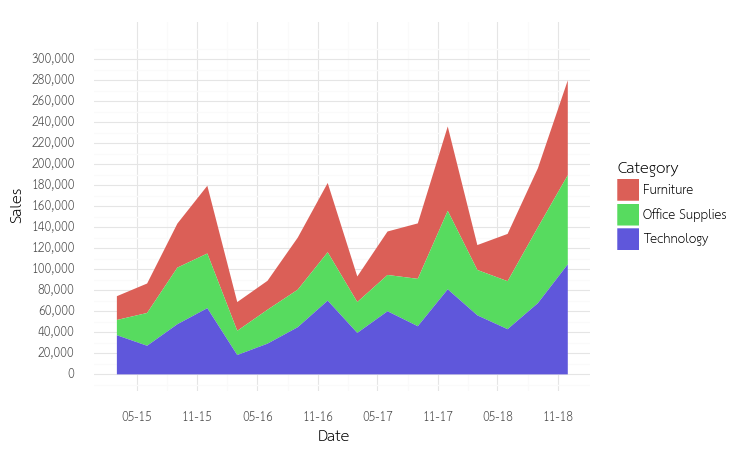

<ggplot: (8731328762316)>

In [59]:
g = (ggplot(df,aes(x='Date',y='Sales',fill='Category',group='Category')) +
    geom_area() + 
    scale_x_date(breaks=date_breaks('6 months'),
                labels=date_format('%m-%y')) +
     scale_y_continuous(limits=(0,320000), breaks=range(0,320000,20000),
                        labels=utils.prettynum_format())
    )
g

If you want to see how they appear by proportions you can plot:

In [54]:
df_date = df.groupby('Date').sum().reset_index()
df = df.merge(df_date,on='Date')
df['sales_per'] = df['Sales_x'] / df['Sales_y']
df.head()

,Date,Sales_x,Category,Sales_y,sales_per
0,2015-03-01,22656.1390,Furniture,74447.7960,0.304322
1,2015-03-01,14528.6830,Office Supplies,74447.7960,0.195153
2,2015-03-01,37262.9740,Technology,74447.7960,0.500525
3,2015-06-01,28063.7496,Furniture,86538.7596,0.324291
4,2015-06-01,31243.7350,Office Supplies,86538.7596,0.361037


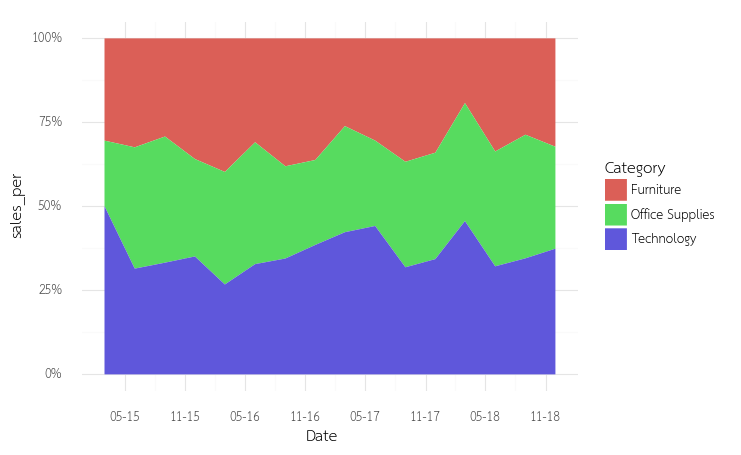

<ggplot: (8731329756175)>

In [55]:
g = (ggplot(df,aes(x='Date',y='sales_per',fill='Category',group='Category')) +
    geom_area() + 
    scale_x_date(breaks=date_breaks('6 months'),
                labels=date_format('%m-%y')) +
     scale_y_continuous(labels=percent_format())
    )
g

## Candlestick
Usually focused on day-to-day activity, these charts show opening/closing and hi/low points of each day

In [72]:
df = pd.read_csv('data/candlestick.csv')
df['close_on'] = df.apply(lambda row: 'high' if row['open'] < row['close'] else 'low',1)
df.head()

,date,open,high,low,close,close_on
0,2009-06-01,28.70,30.05,28.45,30.04,high
1,2009-06-02,30.04,30.13,28.30,29.63,low
2,2009-06-03,29.62,31.79,29.62,31.02,high
3,2009-06-04,31.02,31.02,29.92,30.18,low
4,2009-06-05,29.39,30.81,28.85,29.62,high


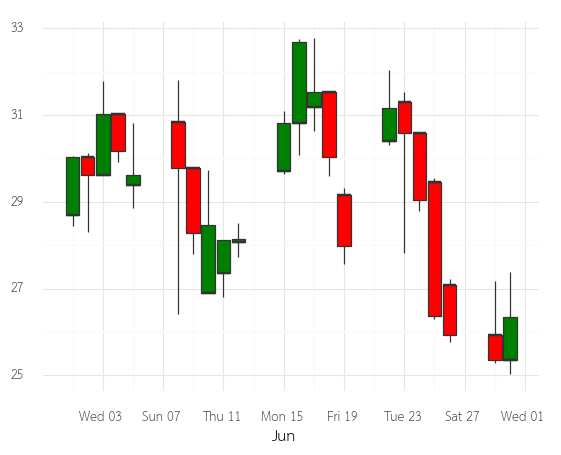

<ggplot: (8731329125068)>

In [104]:
dow = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = (ggplot(df,aes(x='date',lower='close', middle='open', upper='open', ymin='low',ymax='high',
                  fill='close_on')) +
    geom_boxplot(stat='identity') + theme(legend_position='none') +
    #customize date to show day of week
    scale_x_date(breaks=date_breaks('4 days'),
                 labels=lambda x: [f'{dow[i.weekday()]} {str(i)[8:11]}' for i in x])+
    #manual fill
    scale_fill_manual(values=['green', 'red']) +
    xlab('Jun')
    )
g

## Fan chart (projections)
Use to show the uncertainty in future projections - usually this grows the further forward to projection

In [125]:
df = pd.read_csv('data/fan-chart-projections.csv')
df.head()

,WeekDate,Projection,Close,Projectedli,Projectedho
69,2014-06-02,1,1354.68,1103.68,1584.68
70,2014-06-09,1,1341.61,1187.61,1575.61
71,2014-06-16,1,1348.23,1080.23,1624.23
72,2014-06-23,1,1337.97,1098.97,1606.97
73,2014-06-30,1,1334.89,1150.89,1540.89


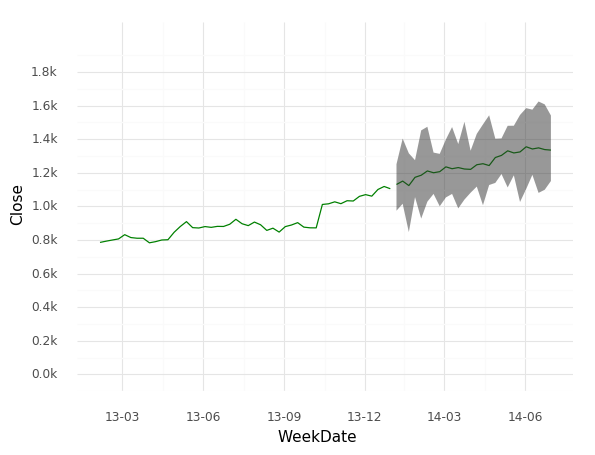

<ggplot: (-9223363305525184284)>

In [124]:
#when fan is defined
g = (ggplot(df,aes(x='WeekDate',y='Close',group='Projection',
                   ymin='Projectedli',ymax='Projectedho')) +
     geom_line(color='green') + theme_minimal() + 
     #add ribbons
     geom_ribbon(alpha=0.5) +
     #formatting date x-axis
     scale_x_date(breaks=date_breaks('3 months'), 
                  labels=date_format('%y-%m')) +
     scale_y_continuous(limits=(0,2000),
                        breaks=range(0,2000,200),
                        labels=lambda x: [f'{round(i/1000,1)}k' for i in x])
    )
g

In [140]:
new_df = df[['WeekDate','Projection']].merge(df[df['Projection']==0], on='WeekDate',how='left')
new_df = new_df[['WeekDate','Close']]
new_df.tail()

,WeekDate,Close
69,2014-06-02,NaN
70,2014-06-09,NaN
71,2014-06-16,NaN
72,2014-06-23,NaN
73,2014-06-30,NaN


In [158]:
#install scikit-misc for loess smoothing
!pip install scikit-misc

    100% |████████████████████████████████| 9.2MB 376kB/s 
You are using pip version 19.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/home/charin/anaconda3/envs/drlnd/lib/python3.6/site-packages/plotnine/stats/smoothers.py:176: PlotnineWarning: Making prediction outside the data range, setting loess control parameter `surface='direct'`.
  PlotnineWarning)
/home/charin/anaconda3/envs/drlnd/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 26 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


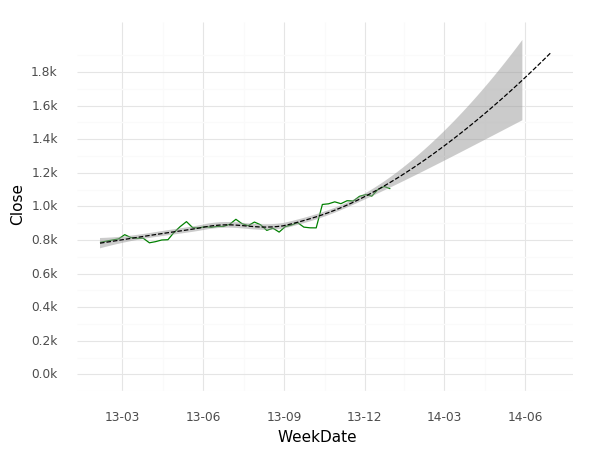

<ggplot: (8731330092934)>

In [159]:
#when fan is defined
g = (ggplot(new_df,aes(x='WeekDate',y='Close',group=1)) +
     geom_line(color='green') + theme_minimal() + 
     #add smoothing
     geom_smooth(linetype='dashed',alpha=0.5,color='black',size=0.5,
                 method='loess',se=True,fullrange=True,level=0.95)+ #method, show error band, fullrange
     #formatting date x-axis
     scale_x_date(breaks=date_breaks('3 months'), 
                  labels=date_format('%y-%m')) +
     scale_y_continuous(limits=(0,2000),
                        breaks=range(0,2000,200),
                        labels=lambda x: [f'{round(i/1000,1)}k' for i in x])
    )
g

/home/charin/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/charin/anaconda3/envs/drlnd/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 26 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


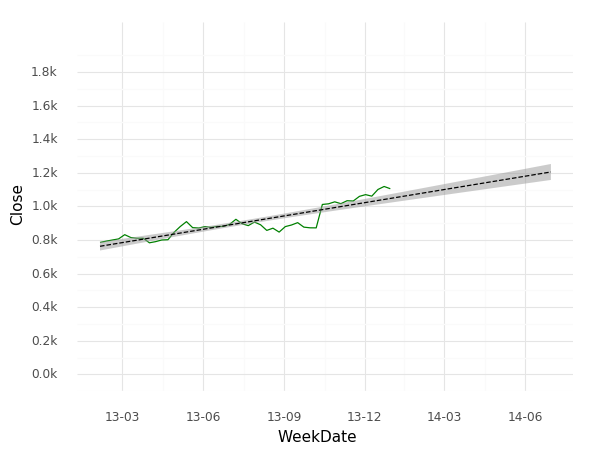

<ggplot: (-9223363305517489071)>

In [160]:
#linear extrapolation
g = (ggplot(new_df,aes(x='WeekDate',y='Close',group=1)) +
     geom_line(color='green') + theme_minimal() + 
     #add smoothing
     geom_smooth(linetype='dashed',alpha=0.5,color='black',size=0.5,
                 method='glm',se=True,fullrange=True,level=0.95)+ #method, show error band, fullrange
     #formatting date x-axis
     scale_x_date(breaks=date_breaks('3 months'), 
                  labels=date_format('%y-%m')) +
     scale_y_continuous(limits=(0,2000),
                        breaks=range(0,2000,200),
                        labels=lambda x: [f'{round(i/1000,1)}k' for i in x])
    )
g

## Connected scatterplot
Usually used to show how the relationship between 2 variables has changed over time.

In [10]:
df = pd.read_csv('data/connected-scatterplot.csv')
df.head()

,Year,Bottom 90%,Top 0.01%
0,1917,0.205,0.094
1,1919,0.206,0.069
2,1921,0.226,0.049
3,1923,0.207,0.052
4,1925,0.177,0.067


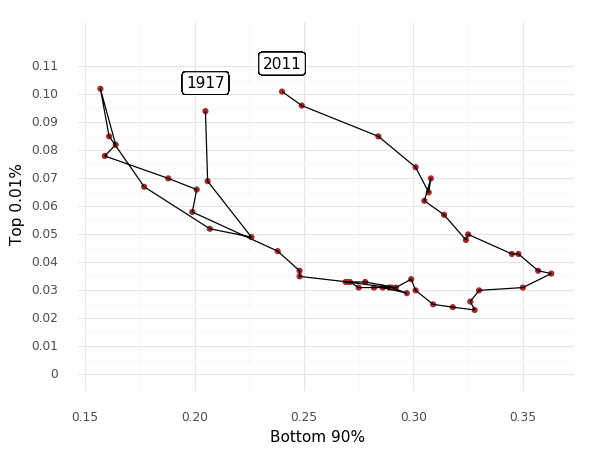

<ggplot: (8731330341047)>

In [11]:
g = (ggplot(df,aes(x='Bottom 90%',y='Top 0.01%')) +
     geom_point(color='brown') + 
     geom_path() + #use geom_path to connect in order
     theme_minimal() +
     #annotate
     geom_label(aes(x=df.iloc[0,1],y=df.iloc[0,2]),
               label=df.iloc[0,0],nudge_y=0.01) +
     geom_label(aes(x=df.iloc[-1,1],y=df.iloc[-1,2]),
               label=df.iloc[-1,0],nudge_y=0.01) +
    scale_y_continuous(limits=(0,0.12), breaks=[i/100 for i in range(0,12,1)]) +
    #axis labels
    xlab('Bottom 90%') + ylab('Top 0.01%')
    )
g

## Calendar heatmap
A great way of showing temporal patterns (daily, weekly, monthly), at the expense of showing precision in quantity

In [161]:
df = pd.read_csv('data/calendar-heatmap.csv')
df.head()

,Month,Year,Number
0,Jan,2010,35
1,Feb,2010,25
2,Mar,2010,35
3,Apr,2010,48
4,May,2010,93


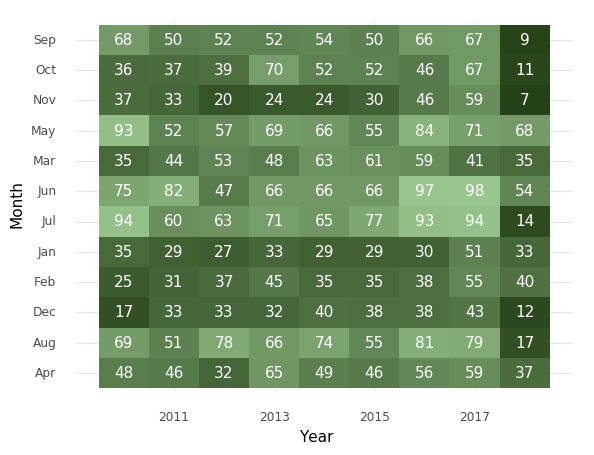

<ggplot: (8731329479800)>

In [169]:
g = (ggplot(df,aes(x='Year', y ='Month', 
                   label='Number', fill='Number')) +
     geom_tile() + geom_text(color='white') +
     scale_fill_gradient(low = "#254117", high = "#99C68E") + #custom gradient
     theme_minimal() + theme(legend_position='none')
    ) 
g

## Priestley timeline
Great when date and duration are key elements of the story in the data

In [192]:
df = pd.read_csv('data/priestley-timeline.csv')
df_m = df.melt(id_vars='Name')
df_m.tail()

,Name,variable,value
11,Berlioz,Died,08-03-1869
12,Schubert,Died,19-11-1828
13,Beethoven,Died,26-03-1827
14,Mozart,Died,05-12-1791
15,Haydn,Died,31-05-1809


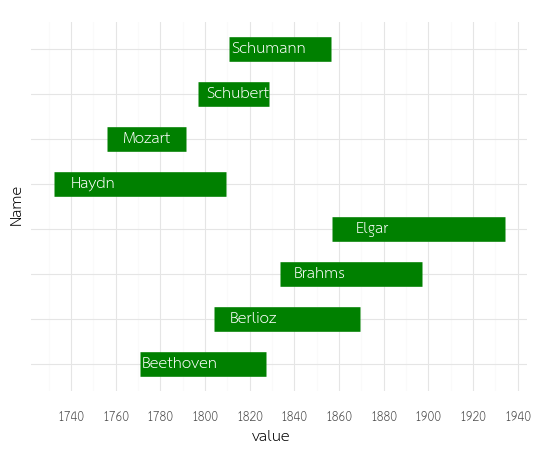

<ggplot: (8731330140792)>

In [216]:
g = (ggplot(df_m, aes(x='Name',y='value',group='Name')) +
     geom_line(size=10,color='green') + coord_flip() +
     geom_text(df_m[df_m.variable=='Born'],aes(x='Name',y='value',label='Name'),
               nudge_y=6500,color='white') +
     scale_y_date(breaks=date_breaks('20 years'), labels=date_format('%Y')) +
     theme(axis_text_y=element_blank())
    )
g

## Circle timeline
Good for showing discrete values of varying size across multiple categories (eg earthquakes by contintent)

In [217]:
df = pd.read_csv('data/area-chart.csv')
df.head()

,Date,Sales,Category
0,2015-03-01,22656.1390,Furniture
1,2015-03-01,14528.6830,Office Supplies
2,2015-03-01,37262.9740,Technology
3,2015-06-01,28063.7496,Furniture
4,2015-06-01,31243.7350,Office Supplies


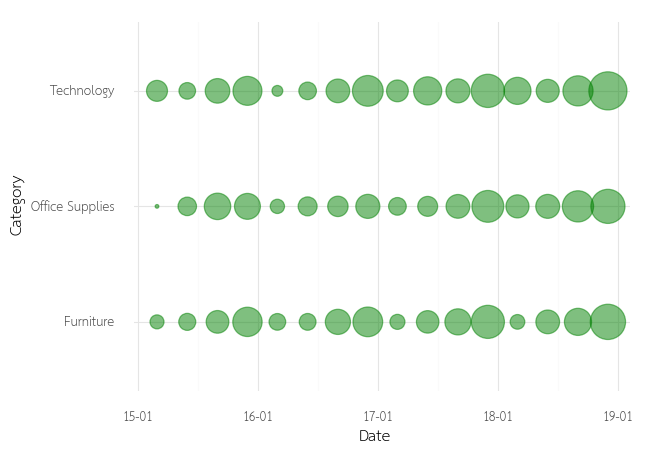

<ggplot: (-9223363305525095869)>

In [231]:
g = (ggplot(df, aes(x='Category',y='Date',size='Sales')) +
     geom_point(alpha=0.5, color='green') + 
     scale_size(range = (1, 15)) + #size scaling
     coord_flip() +
     scale_y_date(breaks=date_breaks('1 year'), labels=date_format('%y-%m')) +
     guides(size=False)
    )
g

## Vertical timeline
Presents time on the Y axis. Good for displaying detailed time series that work especially well when scrolling on mobile

In [232]:
df = pd.read_csv('data/column-line-timeline.csv')
df.head()

,Order Date,Sales,Profit
0,2015 Mar,148895.5920,7622.4580
1,2015 Jun,173077.5192,22408.1384
2,2015 Sep,287266.4246,25609.4436
3,2015 Dec,359255.4604,43447.9082
4,2016 Mar,137703.4772,18529.8832


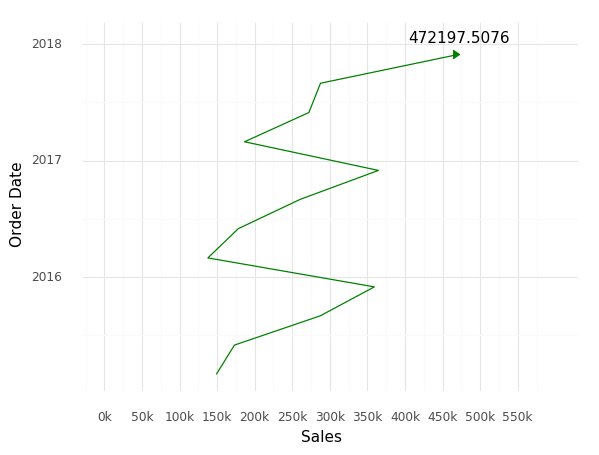

<ggplot: (8731329068250)>

In [258]:
g = (ggplot(df,aes(x='Order Date',y='Sales',group=1)) +
     geom_line(color='green') + theme_minimal() + coord_flip() +
     geom_point(df[df.index==df.index.max()],
               aes(x='Order Date', y='Sales'), color='green', shape=5,size=3) + #change shape
     geom_text(df[df.index==df.index.max()],
               aes(x='Order Date', y='Sales',
                  label='Sales'), nudge_x=50) + #nudge it a bit to the right
     #formatting date x-axis
     scale_x_date(breaks=date_breaks('1 year'), labels=date_format('%Y')) +
     scale_y_continuous(limits=(0,600000),
                        breaks=range(0,600000,50000),
                        labels=utils.k_format()) +
     ylab('Sales') + xlab('Order Date') 
    )
g

## Seismogram
Another alternative to the circle timeline for showing series where there are big variations in the data

In [265]:
#mutate to reorder the plot
df = pd.read_csv('data/column-line-timeline.csv')
df = df[['Order Date','Sales']]
df['half_sales'] = df['Sales']/2
df['max_half_sales'] = df.half_sales.max()
df['high_sales'] = df.max_half_sales+df.half_sales
df['low_sales'] = df.max_half_sales-df.half_sales
df.head()

,Order Date,Sales,half_sales,max_half_sales,high_sales,low_sales
0,2015 Mar,148895.5920,74447.7960,236098.7538,310546.5498,161650.9578
1,2015 Jun,173077.5192,86538.7596,236098.7538,322637.5134,149559.9942
2,2015 Sep,287266.4246,143633.2123,236098.7538,379731.9661,92465.5415
3,2015 Dec,359255.4604,179627.7302,236098.7538,415726.4840,56471.0236
4,2016 Mar,137703.4772,68851.7386,236098.7538,304950.4924,167247.0152


In [268]:
df_m = df[['Order Date','high_sales','low_sales']].melt('Order Date')
df_m.head()

,Order Date,variable,value
0,2015 Mar,high_sales,310546.5498
1,2015 Jun,high_sales,322637.5134
2,2015 Sep,high_sales,379731.9661
3,2015 Dec,high_sales,415726.4840
4,2016 Mar,high_sales,304950.4924


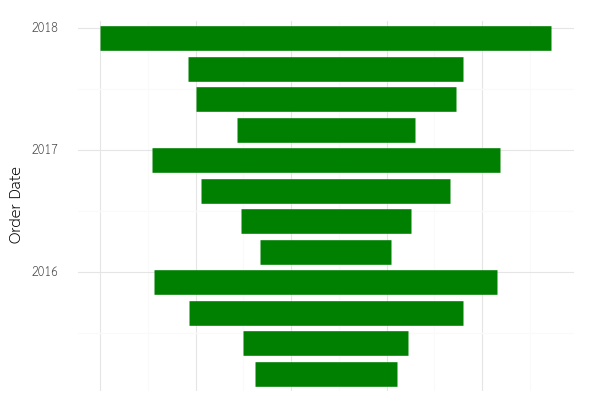

<ggplot: (8731329850723)>

In [285]:
g = (ggplot(df_m, aes(x='Order Date',y='value',group='Order Date')) +
     geom_line(size=10,color='green') + coord_flip() +
     scale_x_date(breaks=date_breaks('1 year'), labels=date_format('%Y')) +
     theme(axis_text_x=element_blank()) + ylab('')
    )
g

## Streamgraph
A type of area chart; use when seeing changes in proportions over time is more important than individual values

In [318]:
df = pd.read_csv('data/area-chart.csv')
#select category to half in the middle
pos_cats = ['Furniture']
mid_cat = 'Technology'
neg_cats = ['Office Supplies']

def steam_pos(row):
    if row['Category']==mid_cat:
        return row['Sales']/2
    elif row['Category'] in pos_cats:
        return row['Sales']
    else:
        return 0
def steam_neg(row):
    if row['Category']==mid_cat:
        return -row['Sales']/2
    elif row['Category'] in neg_cats:
        return -row['Sales']
    else:
        return 0
df['steam_pos'] = df.apply(steam_pos,1)
df['steam_neg'] = df.apply(steam_neg,1)
df.head()

,Date,Sales,Category,steam_pos,steam_neg
0,2015-03-01,22656.1390,Furniture,22656.1390,0.000
1,2015-03-01,14528.6830,Office Supplies,0.0000,-14528.683
2,2015-03-01,37262.9740,Technology,18631.4870,-18631.487
3,2015-06-01,28063.7496,Furniture,28063.7496,0.000
4,2015-06-01,31243.7350,Office Supplies,0.0000,-31243.735


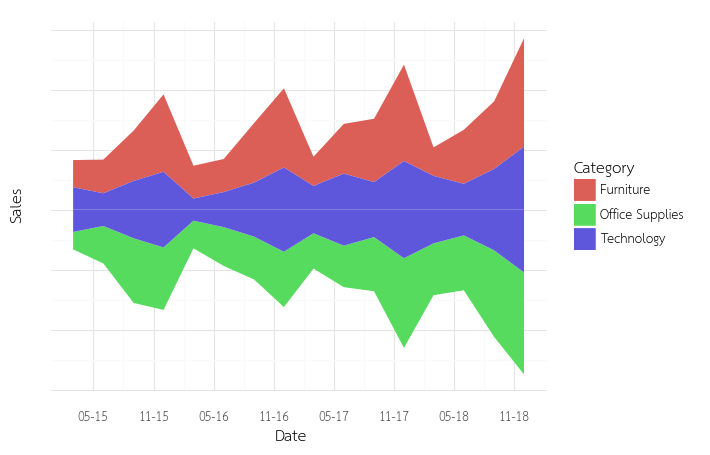

<ggplot: (-9223363305526088311)>

In [322]:
g = (ggplot(df) +
    #one for positive and one for negative y-axis
    geom_area(aes(x='Date',y='steam_pos',fill='Category',group='Category')) +
    geom_area(aes(x='Date',y='steam_neg',fill='Category',group='Category')) +
    scale_x_date(breaks=date_breaks('6 months'),
                labels=date_format('%m-%y')) +
    theme(axis_text_y = element_blank()) + ylab('Sales')
    )
g